In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt  
from os import walk
%matplotlib inline

In [17]:
def import_and_clean_data(path):
    data_inputs = list(map(lambda x: x.strip().split("\t"), open(f"./{path}", "r")))
    data = []
    for idx, datum in enumerate(data_inputs):
        if idx == 0 or idx == 1:
            continue
        else:
            data.append([])
            for val in datum:
                data[idx-2].append(float(val))
    
    data = np.array(data)
    return np.array(data)

In [21]:
def plot(x_data, y_data, title="Plot"):
    plt.plot(x_data, y_data)  
    plt.title('Plot')  
    plt.ylabel('speed')
    plt.xlabel('time')
    plt.draw()  
    plt.show()  


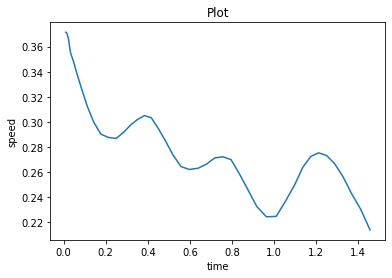

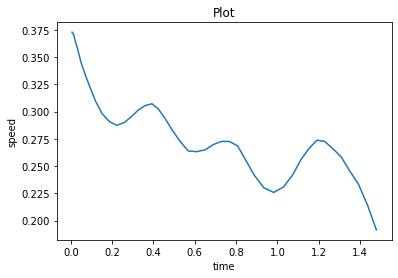

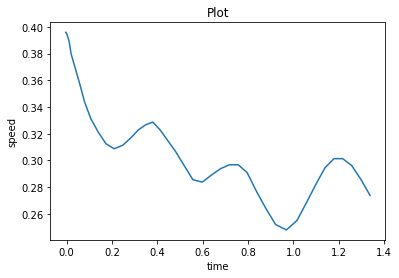

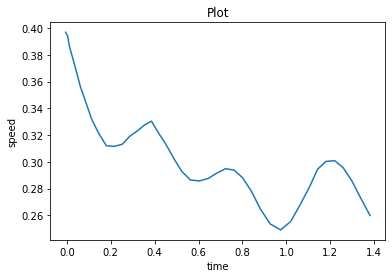

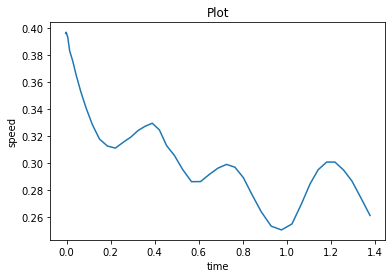

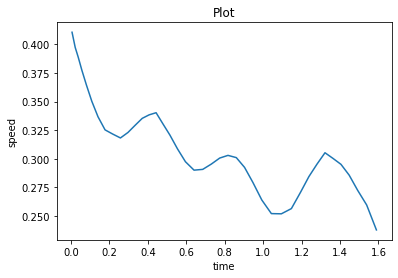

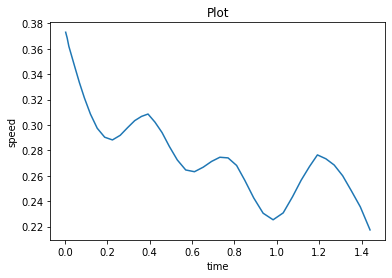

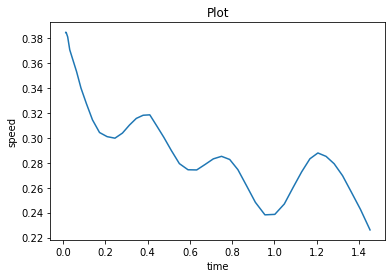

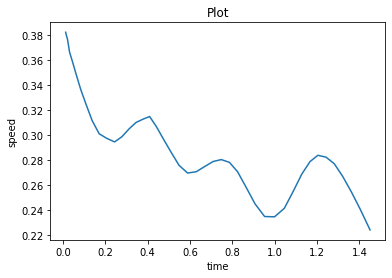

In [24]:
files = []
for i in range(1, 10):
    files.append(import_and_clean_data(f"txy_9_{i}.csv"))
    
for file in files:
    # Plots y distance over time
    # 0 is time, 1 is x, and 2 is y
    plot(file[:,1], file[:,2])

In [26]:
def get_speed(data):
    prev_t = -1e-10
    prev_xy = [data[0][1], data[0][2]]
    speeds = []
    for idx, datum in enumerate(data):
        #print(datum)
        speed = math.sqrt((datum[1] - prev_xy[0])**2 + (datum[2] - prev_xy[1])**2) / (datum[0] - prev_t)
        speeds.append(speed)
        #print(speed)
        prev_t = datum[0]
        prev_xy = [datum[1], datum[2]]
    speeds = np.array(speeds)
    return speeds


[0.         0.13052693 0.25062502 0.49853751 0.49960526 0.62326258
 0.74670858 0.8826189  0.95557655 1.05005166 1.06970637 1.12483262
 1.06897347 1.02818616 0.98913191 0.97745956 0.96641223 1.01458441
 1.0513481  1.13466572 1.19266878 1.20909307 1.2463759  1.18813176
 1.18540142 1.15371437 1.16526951 1.21454915 1.24914853 1.36015656
 1.40238827 1.40080251 1.41365772 1.31571927 1.24447547 1.16525673
 1.10934122 1.14082671 1.16486865 1.21523672 1.29555799 1.35993596
 1.41171292]
[0.         0.04595552 0.14373681 0.35868422 0.41827177 0.59533413
 0.6688756  0.79561154 0.91078588 0.99157777 1.06889721 1.09021489
 1.10905599 1.05833911 1.02843042 0.97945079 0.97615738 0.94191694
 1.02291358 1.08413873 1.15067818 1.21610041 1.2217625  1.23783977
 1.20400921 1.18009025 1.16319425 1.19862521 1.26644745 1.30918911
 1.39375179 1.43603559 1.40737463 1.39131387 1.25599213 1.21507364
 1.18061416 1.13760886 1.1813666  1.21609216 1.27111727 1.36714454
 1.4419636  1.4549453 ]
[0.         0.00670455 0.

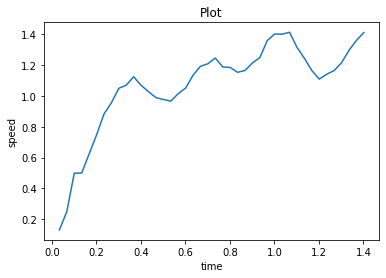

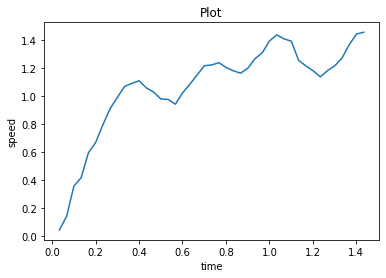

In [7]:

speeds = []
for file in files:
    speed = get_speed(file)
    speeds.append(speed)
    plot(file[1:,0], speed[1:])

#plot(data[1:,0], speeds[1:])

In [ ]:
def delta_x()